In [1]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import KratosMultiphysics
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import os
import random
import re

/home/shreyas/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


 |  /           |                  
 ' /   __| _` | __|  _ \   __|    
 . \  |   (   | |   (   |\__ \  
_|\_\_|  \__,_|\__|\___/ ____/
           Multi-Physics 10.1."0"-master-3ddc3d6e6a-Release-x86_64
           Compiled for GNU/Linux and Python3.12 with GCC-13.3
Compiled with threading support. Threading support with OpenMP.
Maximum number of threads: 12.


In [2]:
# Function to parse the .mdpa file and extract node coordinates and element connectivity
def parse_mdpa(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    x_ini = []  # To store node coordinates
    T = []      # To store element connectivity
    nodes_section = False
    elements_section = False

    for line in lines:
        line = line.strip()

        # Detect the start of the node section
        if line == "Begin Nodes":
            nodes_section = True
            continue
        # Detect the end of the node section
        elif line == "End Nodes":
            nodes_section = False

        # Detect the start of the elements section
        if line.startswith("Begin Elements"):
            elements_section = True
            continue
        # Detect the end of the elements section
        elif line.startswith("End Elements"):
            elements_section = False

        # Extract node coordinates
        if nodes_section:
            parts = line.split()
            node_id = int(parts[0])  # Node ID (not used here, but you can map it if needed)
            coordinates = [float(parts[1]), float(parts[2]), float(parts[3])]  # X, Y, Z coordinates
            x_ini.append(coordinates)

        # Extract element connectivity
        if elements_section:
            parts = line.split()
            # Skip the first two columns (element ID and property ID), and store the node IDs
            node_ids = list(map(int, parts[2:]))  # Node IDs that form the element
            T.append(node_ids)

    x_ini = np.array(x_ini)  # Convert to NumPy array for convenience
    T = np.array(T)  # Convert to NumPy array for convenience
    
    return x_ini, T

In [3]:
def plot_displacement_mesh(x_displaced, displacements, T, title):
    """
    Plots the displaced mesh with displacement magnitude as a color gradient.
    
    Parameters:
    - x_displaced: Node positions after applying displacements.
    - displacements: Displacement values for the nodes.
    - T: Element connectivity.
    - title: Title for the plot (e.g., 'Displaced Mesh with Displacement Magnitude').
    """
    # Calculate displacement magnitude for color mapping
    displacement_magnitude = np.linalg.norm(displacements, axis=1)

    # Create a triangulation object using the node positions and connectivity
    triang = tri.Triangulation(x_displaced[:, 0], x_displaced[:, 1], T)

    # Plot the displaced mesh with a color map based on displacement magnitude
    plt.figure(figsize=(10, 10))
    
    # Use tricontourf to plot the displacement as filled contours
    plt.tricontourf(triang, displacement_magnitude, cmap='jet')
    
    # Overlay the mesh with thin lines
    plt.triplot(triang, color='black', lw=0.5)

    # Add a color bar to show the displacement magnitude
    plt.colorbar(label='Displacement Magnitude')

    # Set the plot properties
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [4]:
# Main function
def main():
    
    # Load the initial node positions and connectivity from the .mdpa file
    file_path = "2D_beam_udl_loading.mdpa"  # Replace with your actual .mdpa file path
    x_ini, T = parse_mdpa(file_path)

    # Convert 1-based indexing to 0-based indexing in T
    T = T - 1

    # Check the shape of x_ini and the max index in T
    print(f"Initial node positions shape: {x_ini.shape}")
    print(f"Max node index in T: {np.max(T)}")

    # pwd = 

    # Load the displacement data from the .npy file
    # displacements = np.load("displacements_modulus_[55.0, -105.0, 155.0].npy")
    # displacements = np.load("displacements_modulus_[295.0, 345.0, 395.0].npy")
    # Specify the folder containing displacement results
    displacement_folder = "displacement_results"

    # Get a list of all displacement files in the folder
    displacement_files = [f for f in os.listdir(displacement_folder) if f.endswith(".npy")]

    # Check if there are any displacement files
    if not displacement_files:
        raise FileNotFoundError(f"No displacement files found in folder: {displacement_folder}")

    # Select one random file from the list
    random_displacement_file = random.choice(displacement_files)
    random_file_path = os.path.join(displacement_folder, random_displacement_file)

    # Load the displacement data from the selected .npy file
    displacements = np.load(random_file_path)

    # Print information about the selected file
    print(f"Selected displacement file: {random_displacement_file}")
    print(f"Displacement data shape: {displacements.shape}")

    # Check the shape of the displacements array before squeezing
    print(f"Displacement shape before squeeze: {displacements.shape}")

    # Remove the extra dimension using np.squeeze
    displacements = np.squeeze(displacements)  # This will remove the (1, ...) dimension

    # Check the shape of the displacements array after squeezing
    print(f"Displacement shape after squeeze: {displacements.shape}")

    # Ensure that displacements and x_ini have the same shape
    if x_ini.shape != displacements.shape:
        print("Error: Displacement array and initial node array shape mismatch after squeeze!")
        return

    # Apply scaled displacements to the initial node positions to get the displaced coordinates
    scaling_factor = 5e5  # Scale the displacements by 5e5 times
    x_displaced = x_ini + scaling_factor * displacements

    # Plot the displaced mesh with a color gradient for displacement magnitude
    plot_displacement_mesh(x_displaced, displacements, T, "Displaced Mesh with Displacement Magnitude")


Initial node positions shape: (306, 3)
Max node index in T: 305
Selected displacement file: displacements_modulus_[340.92, -86.31, 116.81].npy
Displacement data shape: (1, 306, 3)
Displacement shape before squeeze: (1, 306, 3)
Displacement shape after squeeze: (306, 3)


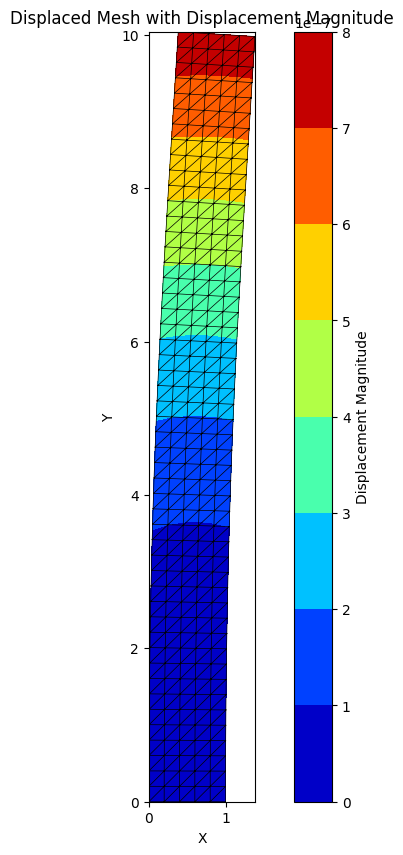

In [5]:
if __name__ == "__main__":
    main()

In [6]:
path = os.getcwd()
# path = os.path.join("output")
print(path)
all_files = os.listdir()
print(all_files)

/home/shreyas/Thesis_new/2D_beam_udl_loading
['displacement_animation.gif', 'dynamic_new03.ipynb', 'SVD_calculation_cleaned.ipynb:Zone.Identifier', 'SVD_calculation_cleaned.ipynb', 'gid_output', 'dynamic_multiple_v2.ipynb:Zone.Identifier', 'ProjectParameters.json', 'dynamic_multiple_v2.ipynb', 'dynamic_v3.ipynb', '2D_beam_udl_loading.mdpa', 'displacement_history.png', 'StructuralMaterials.json', 'Final_Corrected_MainKratos.py', 'loading_results', 'mass_results', 'vtk_output', 'displacement_results', 'stiffness_results', 'MainKratos.py', 'Final_Corrected_MainKratos.py:Zone.Identifier', '2D_beam_udl_loading.post.lst', 'dynamic_results']


In [7]:
# # Dynamically get the current working directory
# current_path = os.getcwd()
# print(f"Current path: {current_path}")

# # Dynamically compute the parent path
# # parent_path = os.path.dirname(current_path)
# parent_path = os.getcwd()
# print(f"Parent path (dynamically obtained): {parent_path}")

# # Dynamically create paths for displacement, loading, and stiffness results
# displacement_path = os.path.join(parent_path, "displacement_results")
# loading_path = os.path.join(parent_path, "loading_results")
# stiffness_path = os.path.join(parent_path, "stiffness_results")

# # Function to check and print path existence
# def check_and_print_path(path_name, path):
#     if os.path.exists(path):
#         print(f"{path_name} exists: {path}")
#     else:
#         print(f"{path_name} does not exist: {path}")

# # Check and print the status of each path
# check_and_print_path("Displacement path", displacement_path)
# check_and_print_path("Loading path", loading_path)
# check_and_print_path("Stiffness path", stiffness_path)

# # Example usage of paths without changing directories
# for path_name, path in [("Displacement path", displacement_path), 
#                         ("Loading path", loading_path), 
#                         ("Stiffness path", stiffness_path)]:
#     if os.path.exists(path):
#         # List files in each folder
#         files = os.listdir(path)
#         print(f"Files in {path_name}: {files}")


import os

# Dynamically get the current working directory
current_path = os.getcwd()
print(f"Current path: {current_path}")

# Dynamically compute the parent path
parent_path = os.getcwd()
print(f"Parent path (dynamically obtained): {parent_path}")

# Dynamically create paths for displacement, loading, stiffness, and mass results
displacement_path = os.path.join(parent_path, "displacement_results")
loading_path = os.path.join(parent_path, "loading_results")
stiffness_path = os.path.join(parent_path, "stiffness_results")
mass_path = os.path.join(parent_path, "mass_results")

# Function to check and print path existence
def check_and_print_path(path_name, path):
    if os.path.exists(path):
        print(f"{path_name} exists: {path}")
    else:
        print(f"{path_name} does not exist: {path}")

# Check and print the status of each path
check_and_print_path("Displacement path", displacement_path)
check_and_print_path("Loading path", loading_path)
check_and_print_path("Stiffness path", stiffness_path)
check_and_print_path("Mass path", mass_path)

# Example usage of paths without changing directories
for path_name, path in [
    ("Displacement path", displacement_path),
    ("Loading path", loading_path),
    ("Stiffness path", stiffness_path),
    ("Mass path", mass_path)
]:
    if os.path.exists(path):
        # List files in each folder
        files = os.listdir(path)
        print(f"Files in {path_name}: {files}")


Current path: /home/shreyas/Thesis_new/2D_beam_udl_loading
Parent path (dynamically obtained): /home/shreyas/Thesis_new/2D_beam_udl_loading
Displacement path exists: /home/shreyas/Thesis_new/2D_beam_udl_loading/displacement_results
Loading path exists: /home/shreyas/Thesis_new/2D_beam_udl_loading/loading_results
Stiffness path exists: /home/shreyas/Thesis_new/2D_beam_udl_loading/stiffness_results
Mass path exists: /home/shreyas/Thesis_new/2D_beam_udl_loading/mass_results
Files in Displacement path: ['displacements_modulus_[340.92, -86.31, 116.81].npy']
Files in Loading path: ['global_force_vector_[340.92, -86.31, 116.81].npy']
Files in Stiffness path: ['stiffness_matrix_[340.92, -86.31, 116.81].npy']
Files in Mass path: ['mass_matrix_[340.92, -86.31, 116.81].npy']


In [8]:
# # Function to extract parameters from the filename for sorting
# def extract_parameters(filename):
#     """
#     Extract parameters from filenames in the format '[...]'.
    
#     Args:
#         filename (str): The filename to extract parameters from.

#     Returns:
#         str: Extracted parameters or an empty string if not found.
#     """
#     match = re.search(r"\[([-.\d, ]+)\]", filename)
#     return match.group(1) if match else ""

# # Sort displacement files from the displacement_results folder
# if os.path.exists(displacement_path):
#     displacement_files = sorted(
#         [f for f in os.listdir(displacement_path) if f.endswith(".npy") and f.startswith("displacements_modulus_")],
#         key=extract_parameters
#     )
#     print(f"Sorted Displacement Files: {displacement_files}")
# else:
#     print("Displacement path does not exist. Cannot sort files.")

# # Sort force vector files from the loading_results folder
# if os.path.exists(loading_path):
#     force_vector_files = sorted(
#         [f for f in os.listdir(loading_path) if f.endswith(".npy") and f.startswith("global_force_vector_")],
#         key=extract_parameters
#     )
#     print(f"Sorted Force Vector Files: {force_vector_files}")
# else:
#     print("Loading path does not exist. Cannot sort files.")

# # Sort stiffness matrix files from the stiffness_results folder
# if os.path.exists(stiffness_path):
#     stiffness_files = sorted(
#         [f for f in os.listdir(stiffness_path) if f.endswith(".npy") and f.startswith("stiffness_matrix_")],
#         key=extract_parameters
#     )
#     print(f"Sorted Stiffness Matrix Files: {stiffness_files}")
# else:
#     print("Stiffness path does not exist. Cannot sort files.")

# Function to extract parameters from the filename for sorting
def extract_parameters(filename):
    """
    Extract parameters from filenames in the format '[...]'.

    Args:
        filename (str): The filename to extract parameters from.

    Returns:
        str: Extracted parameters or an empty string if not found.
    """
    match = re.search(r"\[([-.\d, ]+)\]", filename)
    return match.group(1) if match else ""

# Sort displacement files
if os.path.exists(displacement_path):
    displacement_files = sorted(
        [f for f in os.listdir(displacement_path) if f.endswith(".npy") and f.startswith("displacements_modulus_")],
        key=extract_parameters
    )
    print(f"Sorted Displacement Files: {displacement_files}")
else:
    print("Displacement path does not exist. Cannot sort files.")

# Sort force vector files
if os.path.exists(loading_path):
    force_vector_files = sorted(
        [f for f in os.listdir(loading_path) if f.endswith(".npy") and f.startswith("global_force_vector_")],
        key=extract_parameters
    )
    print(f"Sorted Force Vector Files: {force_vector_files}")
else:
    print("Loading path does not exist. Cannot sort files.")

# Sort stiffness matrix files
if os.path.exists(stiffness_path):
    stiffness_files = sorted(
        [f for f in os.listdir(stiffness_path) if f.endswith(".npy") and f.startswith("stiffness_matrix_")],
        key=extract_parameters
    )
    print(f"Sorted Stiffness Matrix Files: {stiffness_files}")
else:
    print("Stiffness path does not exist. Cannot sort files.")

# Sort mass matrix files
if os.path.exists(mass_path):
    mass_files = sorted(
        [f for f in os.listdir(mass_path) if f.endswith(".npy") and f.startswith("mass_matrix_")],
        key=extract_parameters
    )
    print(f"Sorted Mass Matrix Files: {mass_files}")
else:
    print("Mass path does not exist. Cannot sort files.")


Sorted Displacement Files: ['displacements_modulus_[340.92, -86.31, 116.81].npy']
Sorted Force Vector Files: ['global_force_vector_[340.92, -86.31, 116.81].npy']
Sorted Stiffness Matrix Files: ['stiffness_matrix_[340.92, -86.31, 116.81].npy']
Sorted Mass Matrix Files: ['mass_matrix_[340.92, -86.31, 116.81].npy']


In [9]:
npyfile = [f for f in os.listdir() if f.endswith(".npy")]
print(npyfile)  

[]


In [10]:
# loaded_data = []
# path = os.getcwd()
# print(path)

# Base path dynamically determined
parent_path = os.getcwd()
print(f"Parent path: {parent_path}")

# Path to displacement results
displacement_path = os.path.join(parent_path, "displacement_results")
print(f"Displacement path: {displacement_path}")

# Check if the displacement path exists
if not os.path.exists(displacement_path):
    raise FileNotFoundError(f"Displacement path does not exist: {displacement_path}")

# Get all displacement files from the displacement path
displacement_files = [f for f in os.listdir(displacement_path) if f.endswith(".npy")]
print(f"Displacement files: {displacement_files}")

# for file in displacement_files:
#     file_path = os.path.join(path, file)
#     data = np.load(file)
#     loaded_data.append(data)

# Load and combine displacement data
loaded_data = []
for file in displacement_files:
    # Construct the full file path
    file_path = os.path.join(displacement_path, file)
    print(f"Reading file: {file_path}")

    # Load the .npy file
    data = np.load(file_path)
    loaded_data.append(data)

combined_data = np.vstack(loaded_data)
print(combined_data.shape)
# print(loaded_data.dtype)
print(type(combined_data))
print(combined_data)

Parent path: /home/shreyas/Thesis_new/2D_beam_udl_loading
Displacement path: /home/shreyas/Thesis_new/2D_beam_udl_loading/displacement_results
Displacement files: ['displacements_modulus_[340.92, -86.31, 116.81].npy']
Reading file: /home/shreyas/Thesis_new/2D_beam_udl_loading/displacement_results/displacements_modulus_[340.92, -86.31, 116.81].npy
(1, 306, 3)
<class 'numpy.ndarray'>
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 7.86101639e-10  1.68360977e-09  0.00000000e+00]
  [ 2.62373778e-10  9.94628010e-10  0.00000000e+00]
  [ 1.64536735e-09  3.31856001e-09  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 1.07842641e-09  2.16147166e-09  0.00000000e+00]
  [ 2.64776932e-11  4.80017054e-10  0.00000000e+00]
  [ 7.30694300e-10  1.05330998e-09  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 2.97105945e-09  5.00475476e-09  0.00000000e+00]
  [ 2.38562322e-09  3.33561551e-09  0.00000

In [11]:
flattened_data_all = []

for i in range(combined_data.shape[0]):
    flattened_data = combined_data[i].reshape(-1)
    flattened_data_all.append(flattened_data)

flattened_data_all = np.column_stack(flattened_data_all)

print(flattened_data_all.shape)
print(flattened_data_all.dtype)
print(type(flattened_data_all))
print(flattened_data_all)

(918, 1)
float64
<class 'numpy.ndarray'>
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.86101639e-10]
 [ 1.68360977e-09]
 [ 0.00000000e+00]
 [ 2.62373778e-10]
 [ 9.94628010e-10]
 [ 0.00000000e+00]
 [ 1.64536735e-09]
 [ 3.31856001e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.07842641e-09]
 [ 2.16147166e-09]
 [ 0.00000000e+00]
 [ 2.64776932e-11]
 [ 4.80017054e-10]
 [ 0.00000000e+00]
 [ 7.30694300e-10]
 [ 1.05330998e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.97105945e-09]
 [ 5.00475476e-09]
 [ 0.00000000e+00]
 [ 2.38562322e-09]
 [ 3.33561551e-09]
 [ 0.00000000e+00]
 [-2.75577735e-11]
 [-1.06848404e-11]
 [ 0.00000000e+00]
 [ 2.01927322e-09]
 [ 1.66044622e-09]
 [ 0.00000000e+00]
 [ 6.27567827e-10]
 [-8.56580053e-12]
 [ 0.00000000e+00]
 [ 4.84562427e-09]
 [ 6.74149754e-09]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.0000

In [12]:
U, S, VT = np.linalg.svd(flattened_data_all, full_matrices=False)
S = np.diag(S)

print(S.shape)
print(U.shape)
print(S)

(1, 1)
(918, 1)
[[6.31587854e-06]]


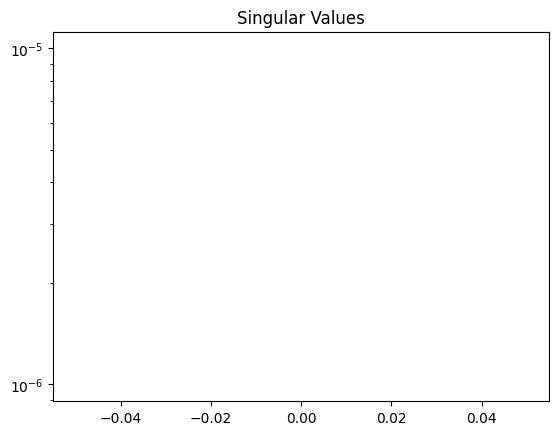

In [13]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

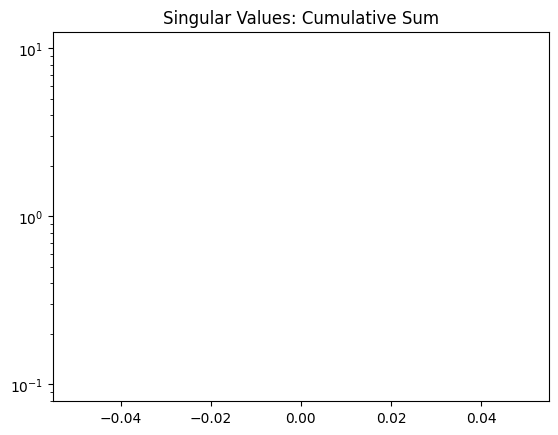

In [14]:
plt.figure(2)
plt.semilogy(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

In [15]:
# Compute cumulative energy
cumulative_energy = np.cumsum(S) / np.sum(S)

# Find the index where cumulative energy exceeds 99.9%
r_energy = np.argmax(cumulative_energy >= 0.999) + 1

# Apply threshold to truncate singular values that drop below 10^-13
r_threshold = np.sum(S >= 1e-19)  # Count all singular values >= 10^-13


# Choose the smaller rank to ensure both conditions are met
r = min(r_energy, r_threshold)

# Select the reduced basis
V_r = U[:, :r]

# Print results
print(f"Cumulative Energy: {cumulative_energy}")
print(f"Rank for 99.9% energy: {r_energy}")
print(f"Rank for threshold 10^-19: {r_threshold}")
print(f"Final Truncated Rank: {r}")
print(f"Reduced Basis V shape: {V_r.shape}")
print(f"Reduced Basis V: \n{V_r}")

Cumulative Energy: [1.]
Rank for 99.9% energy: 1
Rank for threshold 10^-19: 1
Final Truncated Rank: 1
Reduced Basis V shape: (918, 1)
Reduced Basis V: 
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.24464338e-04]
 [ 2.66567787e-04]
 [ 0.00000000e+00]
 [ 4.15419291e-05]
 [ 1.57480548e-04]
 [ 0.00000000e+00]
 [ 2.60512824e-04]
 [ 5.25431258e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.70748440e-04]
 [ 3.42228187e-04]
 [ 0.00000000e+00]
 [ 4.19224230e-06]
 [ 7.60016284e-05]
 [ 0.00000000e+00]
 [ 1.15691633e-04]
 [ 1.66771728e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 4.70411113e-04]
 [ 7.92408330e-04]
 [ 0.00000000e+00]
 [ 3.77718351e-04]
 [ 5.28131675e-04]
 [ 0.00000000e+00]
 [-4.36325261e-06]
 [-1.69174254e-06]
 [ 0.00000000e+00]
 [ 3.19713752e-04]
 [ 2.62900278e-04]
 [ 0.00000000e+00]
 [ 9.93635048e-05]
 [-1.35623263e-06]
 [ 0.0000000

In [16]:
u_r = V_r.T @ flattened_data_all

print(u_r.shape)
print(u_r)

(1, 1)
[[6.31587854e-06]]


In [17]:
# loaded_force_data = []

# pwd = os.chdir("../loading_results")
# print(path)
      
# Base path dynamically determined
parent_path = os.getcwd()
print(f"Parent path: {parent_path}")

# Path to loading results
loading_path = os.path.join(parent_path, "loading_results")
print(f"Loading path: {loading_path}")

# Check if the loading path exists
if not os.path.exists(loading_path):
    raise FileNotFoundError(f"Loading path does not exist: {loading_path}")

# Get all force vector files from the loading path
force_vector_files = [f for f in os.listdir(loading_path) if f.endswith(".npy")]
print(f"Force vector files: {force_vector_files}")

# for file in force_vector_files:
#     file_path = os.path.join(path, file)
#     data = np.load(file)
#     loaded_force_data.append(data)

# Load and combine force vector data
loaded_force_data = []
for file in force_vector_files:
    # Construct the full file path
    file_path = os.path.join(loading_path, file)
    print(f"Reading file: {file_path}")

    # Load the .npy file
    data = np.load(file_path)
    loaded_force_data.append(data)

combined_force_data = np.vstack(loaded_force_data)
print(combined_force_data.shape)
# print(loaded_data.dtype)
print(type(combined_force_data))
print(combined_force_data)

Parent path: /home/shreyas/Thesis_new/2D_beam_udl_loading
Loading path: /home/shreyas/Thesis_new/2D_beam_udl_loading/loading_results
Force vector files: ['global_force_vector_[340.92, -86.31, 116.81].npy']
Reading file: /home/shreyas/Thesis_new/2D_beam_udl_loading/loading_results/global_force_vector_[340.92, -86.31, 116.81].npy
(1, 612)
<class 'numpy.ndarray'>
[[ 5.89686573e+01  2.09760312e+02 -2.80885446e+01  2.47154181e+02
   4.61852778e-14 -5.68434189e-14 -1.06581410e-14 -1.42108547e-13
   1.06581410e-14  3.69482223e-13 -4.47233780e+01  1.24989001e+02
   3.17967874e-13  5.11590770e-13 -1.77635684e-14 -1.42108547e-14
  -5.15143483e-14  1.42108547e-13 -4.82690309e+01  7.92022391e+00
   3.49942297e-13 -1.13686838e-13 -2.07833750e-13  0.00000000e+00
   3.19744231e-14  1.24344979e-14 -4.44089210e-14  2.84217094e-13
   6.21724894e-14  5.86197757e-14 -1.66977543e-13 -1.70530257e-13
  -3.67081255e+01 -1.04425733e+02 -1.77635684e-14  1.56319402e-13
  -5.73763259e-13  5.40012479e-13 -5.826450

In [18]:
loaded_force_data = []

for file in force_vector_files:
    # Construct the full file path
    file_path = os.path.join(loading_path, file)  # Use the correct path variable

    # Load the .npy file from the correct path
    data = np.load(file_path)  # Use `file_path` instead of `file`

    # Reshape the data based on its size and dimensions
    if data.ndim == 1 and data.size == 612:
        data = data.reshape(1, 612)
    elif data.ndim == 1 and data.size == 10 * 612:
        data = data.reshape(10, 612)

    # Add Z-coordinates with zeros for every 3rd column
    data_with_z = np.zeros((data.shape[0], data.shape[1] * 3 // 2))
    data_with_z[:, ::3] = data[:, ::2]  # X-coordinates
    data_with_z[:, 1::3] = data[:, 1::2]  # Y-coordinates

    # Append the modified data
    loaded_force_data.append(data_with_z)

# Combine all loaded data into a single array
combined_force_data = np.vstack(loaded_force_data)

# Print combined data details
print(combined_force_data.shape)
print(type(combined_force_data))
print(combined_force_data)


(1, 918)
<class 'numpy.ndarray'>
[[ 5.89686573e+01  2.09760312e+02  0.00000000e+00 -2.80885446e+01
   2.47154181e+02  0.00000000e+00  4.61852778e-14 -5.68434189e-14
   0.00000000e+00 -1.06581410e-14 -1.42108547e-13  0.00000000e+00
   1.06581410e-14  3.69482223e-13  0.00000000e+00 -4.47233780e+01
   1.24989001e+02  0.00000000e+00  3.17967874e-13  5.11590770e-13
   0.00000000e+00 -1.77635684e-14 -1.42108547e-14  0.00000000e+00
  -5.15143483e-14  1.42108547e-13  0.00000000e+00 -4.82690309e+01
   7.92022391e+00  0.00000000e+00  3.49942297e-13 -1.13686838e-13
   0.00000000e+00 -2.07833750e-13  0.00000000e+00  0.00000000e+00
   3.19744231e-14  1.24344979e-14  0.00000000e+00 -4.44089210e-14
   2.84217094e-13  0.00000000e+00  6.21724894e-14  5.86197757e-14
   0.00000000e+00 -1.66977543e-13 -1.70530257e-13  0.00000000e+00
  -3.67081255e+01 -1.04425733e+02  0.00000000e+00 -1.77635684e-14
   1.56319402e-13  0.00000000e+00 -5.73763259e-13  5.40012479e-13
   0.00000000e+00 -5.82645043e-13  7.283063

In [19]:
# loaded_force_data = []

# for file in force_vector_files:
#     file_path = os.path.join(path, file)
#     data = np.load(file) 

    
#     if data.ndim == 1 and data.size == 2222:
#         data = data.reshape(1, 2222)  
#     elif data.ndim == 1 and data.size == 10 * 2222:
#         data = data.reshape(10, 2222)  

#     data_with_z = np.zeros((data.shape[0], data.shape[1] * 3 // 2))

#     data_with_z[:, ::3] = data[:, ::2]  
#     data_with_z[:, 1::3] = data[:, 1::2]  

#     loaded_force_data.append(data_with_z)

# combined_force_data = np.vstack(loaded_force_data)

# print(combined_force_data.shape)  
# print(type(combined_force_data))
# print(combined_force_data)

In [20]:
flattened_force_data_all = combined_force_data.T

print(flattened_force_data_all.shape)
print(flattened_force_data_all.dtype)
print(type(flattened_force_data_all))
print(flattened_force_data_all)

(918, 1)
float64
<class 'numpy.ndarray'>
[[ 5.89686573e+01]
 [ 2.09760312e+02]
 [ 0.00000000e+00]
 [-2.80885446e+01]
 [ 2.47154181e+02]
 [ 0.00000000e+00]
 [ 4.61852778e-14]
 [-5.68434189e-14]
 [ 0.00000000e+00]
 [-1.06581410e-14]
 [-1.42108547e-13]
 [ 0.00000000e+00]
 [ 1.06581410e-14]
 [ 3.69482223e-13]
 [ 0.00000000e+00]
 [-4.47233780e+01]
 [ 1.24989001e+02]
 [ 0.00000000e+00]
 [ 3.17967874e-13]
 [ 5.11590770e-13]
 [ 0.00000000e+00]
 [-1.77635684e-14]
 [-1.42108547e-14]
 [ 0.00000000e+00]
 [-5.15143483e-14]
 [ 1.42108547e-13]
 [ 0.00000000e+00]
 [-4.82690309e+01]
 [ 7.92022391e+00]
 [ 0.00000000e+00]
 [ 3.49942297e-13]
 [-1.13686838e-13]
 [ 0.00000000e+00]
 [-2.07833750e-13]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.19744231e-14]
 [ 1.24344979e-14]
 [ 0.00000000e+00]
 [-4.44089210e-14]
 [ 2.84217094e-13]
 [ 0.00000000e+00]
 [ 6.21724894e-14]
 [ 5.86197757e-14]
 [ 0.00000000e+00]
 [-1.66977543e-13]
 [-1.70530257e-13]
 [ 0.00000000e+00]
 [-3.67081255e+01]
 [-1.04425733e+02]
 [ 0.0000

In [21]:
# Assuming u_r is your reduced displacement matrix
u_r_pseudo_inverse = np.linalg.pinv(u_r)

# Print the shape and contents of the pseudo-inverse
print(u_r_pseudo_inverse.shape)
print(u_r_pseudo_inverse)

(1, 1)
[[158331.10061983]]


In [22]:
K_r = (V_r.T @ flattened_force_data_all) @ u_r_pseudo_inverse

print(K_r.shape)
print(K_r)

(1, 1)
[[3.49412453e-05]]


In [23]:
# import os
# import numpy as np

# # Base path dynamically determined
# parent_path = os.getcwd()
# print(f"Parent path: {parent_path}")

# # Path to stiffness results
# stiffness_path = os.path.join(parent_path, "stiffness_results")
# print(f"Stiffness path: {stiffness_path}")

# # Check if the stiffness path exists
# if not os.path.exists(stiffness_path):
#     raise FileNotFoundError(f"Stiffness path does not exist: {stiffness_path}")

# # Get all stiffness matrix files from the stiffness path
# stiffness_files = [f for f in os.listdir(stiffness_path) if f.endswith(".npy")]
# print(f"Stiffness files: {stiffness_files}")

# # Function to calculate the final size iteratively
# def calculate_final_size(n):
#     """
#     Calculate the final size of the matrix after adding rows and columns
#     for every 3rd multiple (0-based index) iteratively.

#     Args:
#         n (int): The size of the original matrix (rows or columns).

#     Returns:
#         int: The final size of the matrix.
#     """
#     current_size = n
#     while True:
#         multiples_of_3 = len(range(2, current_size + 1, 3))  # Adjusted to `current_size + 1`
#         new_size = n + multiples_of_3
#         if new_size == current_size:  # Convergence
#             break
#         current_size = new_size
#     return current_size

# # Function to add zero rows and columns
# def add_zeros_for_third_multiple(matrix, final_size):
#     """
#     Add rows and columns of zeros for every index that is a multiple of 3 (0-based).

#     Args:
#         matrix (np.ndarray): The input matrix.
#         final_size (int): The final size of the modified matrix.

#     Returns:
#         np.ndarray: The modified matrix with added rows and columns.
#     """
#     original_size = matrix.shape[0]
#     modified_matrix = np.zeros((final_size, final_size))  # Initialize with zeros

#     # Identify indices for zeros
#     indices_to_skip = list(range(2, final_size, 3))
#     original_row = 0

#     for i in range(final_size):
#         if i in indices_to_skip:  # Skip rows for added zeros
#             continue
#         original_col = 0
#         for j in range(final_size):
#             if j in indices_to_skip:  # Skip columns for added zeros
#                 continue
#             modified_matrix[i, j] = matrix[original_row, original_col]
#             original_col += 1
#         original_row += 1

#     return modified_matrix

# # Main process to create the tensor
# processed_matrices = []  # List to store processed matrices
# for file_name in stiffness_files:
#     # Load each stiffness matrix from the correct path
#     file_path = os.path.join(stiffness_path, file_name)
#     matrix = np.load(file_path)
#     print(f"Processing file: {file_name}")
    
#     # Calculate the final size
#     final_size = calculate_final_size(matrix.shape[0])
    
#     # Add zero rows and columns
#     modified_matrix = add_zeros_for_third_multiple(matrix, final_size)
#     print(f"Modified matrix shape: {modified_matrix.shape}")
    
#     # Append the modified matrix to the list
#     processed_matrices.append(modified_matrix)

# # Stack all processed matrices into a 3D tensor
# tensor = np.stack(processed_matrices, axis=-1)
# print(f"Final tensor shape: {tensor.shape}")

# # Save the final tensor to a file (optional)
# # output_tensor_path = os.path.join(stiffness_path, "final_stiffness_tensor.npy")
# # np.save(output_tensor_path, tensor)
# # print(f"Final tensor saved to: {output_tensor_path}")


# # # Function to calculate the final size iteratively
# # def calculate_final_size(n):
# #     current_size = n
# #     while True:
# #         multiples_of_3 = len(range(2, current_size + 1, 3))  # Adjusted to `current_size + 1`
# #         new_size = n + multiples_of_3
# #         if new_size == current_size:  # Convergence
# #             break
# #         current_size = new_size
# #     return current_size

# # # Function to add zero rows and columns
# # def add_zeros_for_third_multiple(matrix, final_size):
# #     original_size = matrix.shape[0]
# #     modified_matrix = np.zeros((final_size, final_size))  # Initialize with zeros

# #     # Identify indices for zeros
# #     indices_to_skip = list(range(2, final_size, 3))
# #     original_row = 0

# #     for i in range(final_size):
# #         if i in indices_to_skip:  # Skip rows for added zeros
# #             continue
# #         original_col = 0
# #         for j in range(final_size):
# #             if j in indices_to_skip:  # Skip columns for added zeros
# #                 continue
# #             modified_matrix[i, j] = matrix[original_row, original_col]
# #             original_col += 1
# #         original_row += 1

# #     return modified_matrix

# # # Main script starts here
# # import os
# # import numpy as np

# # # Base path dynamically determined
# # parent_path = os.getcwd()
# # print(f"Parent path: {parent_path}")

# # # Path to stiffness results
# # stiffness_path = os.path.join(parent_path, "stiffness_results")
# # print(f"Stiffness path: {stiffness_path}")

# # # Check if the stiffness path exists
# # if not os.path.exists(stiffness_path):
# #     raise FileNotFoundError(f"Stiffness path does not exist: {stiffness_path}")

# # # Get all stiffness matrix files from the stiffness path
# # stiffness_files = [f for f in os.listdir(stiffness_path) if f.endswith(".npy")]
# # print(f"Stiffness files: {stiffness_files}")

# # # Main process to create the tensor
# # processed_matrices = []  # List to store processed matrices
# # for file_name in stiffness_files:
# #     # Load each stiffness matrix from the correct path
# #     file_path = os.path.join(stiffness_path, file_name)
# #     matrix = np.load(file_path)
# #     print(f"Processing file: {file_name}")

# #     # Ensure the matrix contains numeric data
# #     matrix = np.asarray(matrix, dtype=np.float64)

# #     # Calculate the final size
# #     final_size = calculate_final_size(matrix.shape[0])

# #     # Add zero rows and columns
# #     modified_matrix = add_zeros_for_third_multiple(matrix, final_size)
# #     print(f"Modified matrix shape: {modified_matrix.shape}")

# #     # Append the modified matrix to the list
# #     processed_matrices.append(modified_matrix)

# # # Stack all processed matrices into a 3D tensor
# # tensor = np.stack(processed_matrices, axis=-1)
# # print(f"Final tensor shape: {tensor.shape}")

# # # Save the final tensor to a file (optional)
# # output_tensor_path = os.path.join(stiffness_path, "final_stiffness_tensor.npy")
# # np.save(output_tensor_path, tensor)
# # print(f"Final tensor saved to: {output_tensor_path}")



In [24]:
# import os
# import numpy as np

# # Base path dynamically determined
# parent_path = os.getcwd()
# print(f"Parent path: {parent_path}")

# # Path to stiffness results
# path = os.path.join(parent_path, "stiffness_results")
# print(f"Stiffness path: {path}")

# # Check if the stiffness path exists
# if not os.path.exists(path):
#     raise FileNotFoundError(f"Stiffness path does not exist: {path}")

# # Get all stiffness matrix files from the stiffness path
# stiffness_files = [f for f in os.listdir(path) if f.endswith(".npy")]
# print(f"Stiffness files: {stiffness_files}")

# # Ensure there are files to process
# if not stiffness_files:
#     raise FileNotFoundError("No stiffness matrix files found in the specified path.")

# # Load the first file to check its shape (example)
# first_file_path = os.path.join(path, stiffness_files[0])
# matrix = np.load(first_file_path)  # Load the first matrix for demonstration

# # Print the original shape
# print(f"Original matrix shape: {matrix.shape}")

# # Function to calculate the final size iteratively
# def calculate_final_size(n):
#     """
#     Calculate the final size of the matrix after adding rows and columns
#     for every 3rd multiple (0-based index) iteratively.

#     Args:
#         n (int): The size of the original matrix (rows or columns).

#     Returns:
#         int: The final size of the matrix.
#     """
#     current_size = n
#     while True:
#         multiples_of_3 = len(range(2, current_size + 1, 3))  # Adjusted to `current_size + 1`
#         new_size = n + multiples_of_3
#         if new_size == current_size:  # Convergence
#             break
#         current_size = new_size
#     return current_size

# # Calculate the final size
# final_size = calculate_final_size(matrix.shape[0])
# print(f"Final matrix size: {final_size} x {final_size}")

# # Function to add zero rows and columns
# def add_zeros_for_third_multiple(matrix, final_size):
#     """
#     Add rows and columns of zeros for every index that is a multiple of 3 (0-based).

#     Args:
#         matrix (np.ndarray): The input matrix.
#         final_size (int): The final size of the modified matrix.

#     Returns:
#         np.ndarray: The modified matrix with added rows and columns.
#     """
#     original_size = matrix.shape[0]
#     modified_matrix = np.zeros((final_size, final_size))  # Initialize with zeros

#     # Identify indices for zeros
#     indices_to_skip = list(range(2, final_size, 3))
#     original_row = 0

#     for i in range(final_size):
#         if i in indices_to_skip:  # Skip rows for added zeros
#             continue
#         original_col = 0
#         for j in range(final_size):
#             if j in indices_to_skip:  # Skip columns for added zeros
#                 continue
#             modified_matrix[i, j] = matrix[original_row, original_col]
#             original_col += 1
#         original_row += 1

#     return modified_matrix

# # Add zero rows and columns
# modified_matrix = add_zeros_for_third_multiple(matrix, final_size)

# # Print the new shape
# print(f"Modified matrix shape: {modified_matrix.shape}")

# # Save the modified matrix back to a file
# output_file_path = os.path.join(path, "modified_file.npy")
# np.save(output_file_path, modified_matrix)
# print(f"Modified matrix saved to: {output_file_path}")


In [25]:
# # Base path dynamically determined
# parent_path = os.getcwd()
# print(f"Parent path: {parent_path}")

# # Path to stiffness results
# path = os.path.join(parent_path, "stiffness_results")
# print(f"Stiffness path: {path}")

# # Check if the stiffness path exists
# if not os.path.exists(path):
#     raise FileNotFoundError(f"Stiffness path does not exist: {path}")

# # Get all stiffness matrix files from the stiffness path
# stiffness_files = [f for f in os.listdir(path) if f.endswith(".npy")]
# print(f"Stiffness files: {stiffness_files}")

# # Ensure there are files to process
# if not stiffness_files:
#     raise FileNotFoundError("No stiffness matrix files found in the specified path.")

# # List all .npy files in the folder
# file_list = [f for f in os.listdir(path) if f.endswith('.npy')]
# file_list.sort()  # optional, to ensure consistent ordering if needed

# # Parameters
# num_nodes = 1111
# old_dofs_per_node = 2
# new_dofs_per_node = 3

# old_size = old_dofs_per_node * num_nodes  # 2222
# new_size = new_dofs_per_node * num_nodes  # 3333
# n = len(file_list)  # Number of stiffness matrices

# # Initialize the 3D tensor: shape (3333, 3333, n)
# # This might be large in memory (3333x3333 ~ 11 million entries per matrix),
# # Ensure you have enough memory.
# K_tensor = np.zeros((new_size, new_size, n), dtype=np.float64)

# # Mapping from old indexing to new indexing:
# # old index (i) --> node index (i_node = i//2)
# # dof type in old indexing:
# #    even: x-dof, odd: y-dof
# # new indexing:
# #    x-dof -> 3*i_node
# #    y-dof -> 3*i_node + 1
# #    z-dof -> 3*i_node + 2 (not present in old, will remain zero)
# def old_to_new_index(i_old):
#     node = i_old // old_dofs_per_node
#     dof_within_node = i_old % old_dofs_per_node
#     # x-dof old -> x-dof new
#     if dof_within_node == 0:
#         return 3*node     # x-dof
#     else:
#         return 3*node + 1 # y-dof

# # Process each file
# for idx, filename in enumerate(file_list):
#     old_path = os.path.join(path, filename)
#     K_old = np.load(old_path)  # shape: (2222, 2222)
    
#     # Create a new K matrix with dimensions 3333x3333
#     K_new = np.zeros((new_size, new_size), dtype=np.float64)
    
#     # Map each old DOF to new DOF indices (excluding z since it’s zero)
#     # Iterate through old indices and place values into K_new
#     for i_old in range(old_size):
#         i_new = old_to_new_index(i_old)
#         for j_old in range(old_size):
#             j_new = old_to_new_index(j_old)
#             K_new[i_new, j_new] = K_old[i_old, j_old]
    
#     # Note: All z-related rows/columns remain zero since we never assigned them.
#     # i.e., for each node i: the row and column 3*i+2 stays zero.

#     # Place this modified matrix into the 3D tensor
#     K_tensor[:, :, idx] = K_new

# # At this point, K_tensor is a 3D tensor of shape (3333, 3333, n)
# # containing the stiffness matrices with a zeroed z-DOF.
# # The user asked not to save it back as .npy, so we just leave it in memory.
# # You can proceed with further processing as needed.

In [26]:
path = os.getcwd()
print(path)

/home/shreyas/Thesis_new/2D_beam_udl_loading


In [27]:
import os
import numpy as np

# Path to stiffness results
parent_path = os.getcwd()
path = os.path.join(parent_path, "stiffness_results")

if not os.path.exists(path):
    raise FileNotFoundError(f"Stiffness path does not exist: {path}")

stiffness_files = [f for f in os.listdir(path) if f.endswith(".npy")]
if not stiffness_files:
    raise FileNotFoundError("No stiffness matrix files found in the specified path.")

stiffness_files.sort()  # sort for consistency if needed

# Load the first matrix to confirm shape
first_file_path = os.path.join(path, stiffness_files[0])
K_old = np.load(first_file_path)  # should be 2222x2222
old_size = K_old.shape[0]
if K_old.shape[0] != K_old.shape[1]:
    raise ValueError("Stiffness matrix is not square.")
    
num_nodes = 306
old_dofs = 2 * num_nodes
if old_size != old_dofs:
    raise ValueError(f"Expected {old_dofs} old DOFs but found {old_size}.")

new_dofs = 3 * num_nodes  # 3333
print(f"Expanding from {old_size}x{old_size} to {new_dofs}x{new_dofs}")

# Precompute the mapping of old DOFs to new DOFs
# old index i: node = i // 2, dof_type = i % 2 (0 for x, 1 for y)
# new indices: x = 3*node, y = 3*node+1, z = 3*node+2 (z is new and zero)
old_indices = np.arange(old_size)
node_indices = old_indices // 2
dof_within_node = old_indices % 2
new_indices = 3*node_indices + dof_within_node  # maps old x,y -> new x,y indices

# Process each file
# In this example, we only show processing one file. Extend as needed.
for filename in stiffness_files:
    K_old = np.load(os.path.join(path, filename))

    # Initialize new matrix with zeros
    K_new = np.zeros((new_dofs, new_dofs), dtype=K_old.dtype)

    # Place old DOF values into new DOF positions
    # We only populate the x,y DOFs. The z DOFs stay at zero.
    K_new[np.ix_(new_indices, new_indices)] = K_old

    # Now K_new is the expanded matrix with zeroed z-rows and z-columns.
    # If you want to save it, do so. The user mentioned you don't have to save the tensor,
    # but you can show how to save one matrix just as an example.
    output_file_path = os.path.join(path, "modified_"+filename)
    np.save(output_file_path, K_new)
    print(f"Modified matrix saved to: {output_file_path}")


Expanding from 612x612 to 918x918
Modified matrix saved to: /home/shreyas/Thesis_new/2D_beam_udl_loading/stiffness_results/modified_stiffness_matrix_[340.92, -86.31, 116.81].npy


In [28]:
import os
import numpy as np
from pathlib import Path

def check_matrices(directory, pattern):
    """Check if matrices in the directory are identical"""
    # Change to directory
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return
        
    os.chdir(directory)
    
    # Get all matrix files
    matrix_files = list(Path('.').glob(f'{pattern}_*.npy'))
    
    if not matrix_files:
        print(f"No {pattern} files found")
        return
    
    print(f"\nFiles found ({len(matrix_files)}):")
    for file in matrix_files:
        print(f"  {file.name}")
    
    if len(matrix_files) == 1:
        print("\nOnly one file found - no comparison needed")
        return
        
    # Compare files
    reference = np.load(matrix_files[0])
    non_identical = []
    
    for file in matrix_files[1:]:
        current = np.load(file)
        if not np.array_equal(current, reference):
            non_identical.append((matrix_files[0].name, file.name))
    
    if not non_identical:
        print(f"\nAll {pattern} files are identical")
    else:
        print(f"\nNon-identical file pairs:")
        for ref, diff in non_identical:
            print(f"  {ref} ≠ {diff}")

def main():
    base_dir = os.getcwd()
    
    # Check stiffness matrices
    print("\nChecking stiffness matrices...")
    check_matrices("stiffness_results", "stiffness_matrix")
    os.chdir(base_dir)
    
    # Check mass matrices
    print("\nChecking mass matrices...")
    check_matrices("mass_results", "mass_matrix")
    os.chdir(base_dir)

if __name__ == "__main__":
    main()


Checking stiffness matrices...

Files found (1):
  stiffness_matrix_[340.92, -86.31, 116.81].npy

Only one file found - no comparison needed

Checking mass matrices...

Files found (1):
  mass_matrix_[340.92, -86.31, 116.81].npy

Only one file found - no comparison needed


In [29]:
import os
import numpy as np
from pathlib import Path

def check_matrices(directory, pattern):
    """Check if matrices in the directory are identical"""
    base_dir = os.getcwd()
    target_dir = os.path.join(base_dir, directory)
    
    if not os.path.exists(target_dir):
        print(f"Directory not found: {target_dir}")
        return
        
    os.chdir(target_dir)
    
    # Get all matrix files
    matrix_files = list(Path('.').glob(f'{pattern}_*.npy'))
    
    if not matrix_files:
        print(f"No {pattern} files found")
        os.chdir(base_dir)
        return
    
    print(f"\nFiles found ({len(matrix_files)}):")
    for file in matrix_files:
        print(f"  {file.name}")
    
    if len(matrix_files) == 1:
        print("\nOnly one file found - no comparison needed")
        os.chdir(base_dir)
        return
        
    # Compare files
    reference = np.load(matrix_files[0])
    non_identical = []
    
    for file in matrix_files[1:]:
        current = np.load(file)
        if not np.array_equal(current, reference):
            non_identical.append((matrix_files[0].name, file.name))
    
    if not non_identical:
        print(f"All {pattern} files are identical")
    else:
        print(f"Non-identical file pairs:")
        for ref, diff in non_identical:
            print(f"  {ref} ≠ {diff}")
    
    os.chdir(base_dir)

def main():
    # Check all types of matrices in stiffness_results directory
    print("\nChecking original stiffness matrices...")
    check_matrices("stiffness_results", "stiffness_matrix")
    
    print("\nChecking modified stiffness matrices...")
    check_matrices("stiffness_results", "modified_stiffness_matrix")
    
    # Check mass matrices in mass_results directory
    print("\nChecking mass matrices...")
    check_matrices("mass_results", "mass_matrix")

if __name__ == "__main__":
    main()


Checking original stiffness matrices...

Files found (1):
  stiffness_matrix_[340.92, -86.31, 116.81].npy

Only one file found - no comparison needed

Checking modified stiffness matrices...

Files found (1):
  modified_stiffness_matrix_[340.92, -86.31, 116.81].npy

Only one file found - no comparison needed

Checking mass matrices...

Files found (1):
  mass_matrix_[340.92, -86.31, 116.81].npy

Only one file found - no comparison needed


In [30]:
import numpy as np
from pathlib import Path
import os

def calculate_reduced_stiffness(stiffness_path, V_r):
    """
    Calculate reduced stiffness matrix using POD basis
    """
    # Load the stiffness matrix
    K_full = np.load(stiffness_path)
    
    # Calculate reduced stiffness matrix: K_reduced = V_r^T * K_full * V_r
    K_reduced = V_r.T @ K_full @ V_r
    
    return K_full, K_reduced

# Change to stiffness results directory
base_dir = os.getcwd()
stiffness_dir = os.path.join(base_dir, "stiffness_results")
os.chdir(stiffness_dir)

# Get first modified stiffness matrix file
stiffness_files = list(Path('.').glob('modified_stiffness_matrix_*.npy'))
if not stiffness_files:
    print("No modified stiffness matrix files found!")
else:
    stiffness_path = stiffness_files[0]
    print(f"Using stiffness matrix: {stiffness_path.name}")
    
    # Calculate reduced stiffness using existing V_r
    K_full, K_reduced = calculate_reduced_stiffness(stiffness_path, V_r)
    
    # Print full stiffness matrix details
    print("\nFull Stiffness Matrix:")
    print(f"Shape: {K_full.shape} ({K_full.shape[0]} x {K_full.shape[1]})")
    print("Matrix values:")
    print(K_full)
    
    # Print reduced stiffness matrix details
    print("\nReduced Stiffness Matrix:")
    print(f"Shape: {K_reduced.shape} ({K_reduced.shape[0]} x {K_reduced.shape[1]})")
    print("Matrix values:")
    print(K_reduced)

# Return to base directory
os.chdir(base_dir)

Using stiffness matrix: modified_stiffness_matrix_[340.92, -86.31, 116.81].npy

Full Stiffness Matrix:
Shape: (918, 918) (918 x 918)
Matrix values:
[[1.75662606e+11 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.75662606e+11 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.75662606e+11
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.75662606e+11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

Reduced Stiffness Matrix:
Shape: (1, 1) (1 x 1)
Matrix values:
[[1188802.25000964]]


In [31]:
path = os.getcwd()
print(path)

/home/shreyas/Thesis_new/2D_beam_udl_loading


In [32]:
import numpy as np
from pathlib import Path
import os
import random

def calculate_reduced_force(force_path, V_r):
    """
    Calculate reduced force vector using POD basis
    """
    # Load the force vector
    F_full = np.load(force_path)
    
    # Expand force vector from 2222 to 3333 DOFs
    if F_full.size == 612:
        F_expanded = np.zeros(918)
        F_expanded[::3] = F_full[::2]    # X-coordinates
        F_expanded[1::3] = F_full[1::2]  # Y-coordinates
        # Z-coordinates remain zero
    else:
        F_expanded = F_full

    print(F_expanded.shape)
    print(V_r.shape)
        
    # Calculate reduced force vector: F_reduced = V_r^T * F_expanded
    F_reduced = V_r.T @ F_expanded
    
    return F_full, F_expanded, F_reduced

# Define parent path
parent_path = "/home/shreyas/Thesis_new/2D_beam_udl_loading"
os.chdir(parent_path)  # Start from parent path

# Define loading results path
loading_dir = os.path.join(parent_path, "loading_results")

# Change to loading directory
os.chdir(loading_dir)

# Get all force vector files
force_files = list(Path('.').glob('global_force_vector_*.npy'))
if not force_files:
    print("No force vector files found!")
else:
    # Randomly select one force file
    force_path = random.choice(force_files)
    print(f"\nUsing force vector: {force_path.name}")
    
    # Calculate reduced force using existing V_r
    F_full, F_expanded, F_reduced = calculate_reduced_force(force_path, V_r)
    
    # Print original force vector details
    print("\nOriginal Force Vector:")
    print(f"Shape: {F_full.shape}")
    print("First few values:")
    print(F_full[:10])
    
    # Print expanded force vector details
    print("\nExpanded Force Vector (with Z-coordinates):")
    print(f"Shape: {F_expanded.shape}")
    print("First few values:")
    print(F_expanded[:12])  # Show 4 complete xyz triplets
    
    # Print reduced force vector details
    print("\nReduced Force Vector:")
    print(f"Shape: {F_reduced.shape}")
    print("All values:")
    print(F_reduced)

# Return to parent directory
os.chdir(parent_path)


Using force vector: global_force_vector_[340.92, -86.31, 116.81].npy
(918,)
(918, 1)

Original Force Vector:
Shape: (612,)
First few values:
[ 5.89686573e+01  2.09760312e+02 -2.80885446e+01  2.47154181e+02
  4.61852778e-14 -5.68434189e-14 -1.06581410e-14 -1.42108547e-13
  1.06581410e-14  3.69482223e-13]

Expanded Force Vector (with Z-coordinates):
Shape: (918,)
First few values:
[ 5.89686573e+01  2.09760312e+02  0.00000000e+00 -2.80885446e+01
  2.47154181e+02  0.00000000e+00  4.61852778e-14 -5.68434189e-14
  0.00000000e+00 -1.06581410e-14 -1.42108547e-13  0.00000000e+00]

Reduced Force Vector:
Shape: (1,)
All values:
[2.20684661e-10]


In [33]:
import numpy as np
from numpy.linalg import solve

def calculate_displacements(K_reduced, F_reduced, V_r):
    """
    Calculate both reduced and full displacement vectors
    
    Args:
        K_reduced: Reduced stiffness matrix (4x4)
        F_reduced: Reduced force vector (4x1)
        V_r: Reduced basis matrix (3333x4)
        
    Returns:
        u_reduced: Reduced displacement vector (4x1)
        u_full: Full displacement vector (3333x1)
    """
    # Solve reduced system: K_reduced * u_reduced = F_reduced
    u_reduced = solve(K_reduced, F_reduced)
    
    # Reconstruct full displacement: u_full = V_r * u_reduced
    u_full = V_r @ u_reduced
    
    return u_reduced, u_full

# Calculate both reduced and full displacements
u_reduced, u_full = calculate_displacements(K_reduced, F_reduced, V_r)

print("\nReduced Displacement Vector (u_reduced):")
print(f"Shape: {u_reduced.shape}")
print("All values:")
print(u_reduced)

print("\nFull Displacement Vector (u_full):")
print(f"Shape: {u_full.shape}")
print("First few nodes (xyz coordinates):")
for i in range(0, min(12, len(u_full)), 3):
    print(f"Node {i//3}: [{u_full[i]:.6e}, {u_full[i+1]:.6e}, {u_full[i+2]:.6e}]")

# Basic verification
print("\nVerification:")
print(f"Max displacement in reduced space: {np.max(np.abs(u_reduced)):.6e}")
print(f"Max displacement in full space: {np.max(np.abs(u_full)):.6e}")
print(f"Number of DOFs in reduced space: {len(u_reduced)}")
print(f"Number of DOFs in full space: {len(u_full)}")


Reduced Displacement Vector (u_reduced):
Shape: (1,)
All values:
[1.8563614e-16]

Full Displacement Vector (u_full):
Shape: (918,)
First few nodes (xyz coordinates):
Node 0: [0.000000e+00, 0.000000e+00, 0.000000e+00]
Node 1: [0.000000e+00, 0.000000e+00, 0.000000e+00]
Node 2: [2.310508e-20, 4.948462e-20, 0.000000e+00]
Node 3: [7.711683e-21, 2.923408e-20, 0.000000e+00]

Verification:
Max displacement in reduced space: 1.856361e-16
Max displacement in full space: 2.255678e-17
Number of DOFs in reduced space: 1
Number of DOFs in full space: 918


In [34]:
import numpy as np
from numpy.linalg import solve
import os
from pathlib import Path

def calculate_displacements(K_reduced, F_reduced, V_r):
    """
    Calculate both reduced and full displacement vectors
    """
    # Solve reduced system: K_reduced * u_reduced = F_reduced
    u_reduced = solve(K_reduced, F_reduced)
    
    # Reconstruct full displacement: u_full = V_r * u_reduced
    u_full = V_r @ u_reduced
    
    return u_reduced, u_full

# Store the load case value from force vector
load_case = "[-8.77, 371.28, 65.86]"

# Navigate to displacement results directory from parent path
parent_path = "/home/shreyas/Thesis_new/2D_beam_udl_loading"
os.chdir(parent_path)
displacement_dir = os.path.join(parent_path, "displacement_results")
os.chdir(displacement_dir)

# Find and read the corresponding displacement file
displacement_filename = f"displacements_modulus_{load_case}.npy"
print(f"\nLooking for displacement file: {displacement_filename}")

if os.path.exists(displacement_filename):
    # Load the actual displacement
    displacement_actual = np.load(displacement_filename)
    print(f"\nActual Displacement loaded from file:")
    print(f"Original shape: {displacement_actual.shape}")
    
    # Flatten the actual displacement data
    displacement_actual_flat = displacement_actual.reshape(-1)
    print(f"Flattened shape: {displacement_actual_flat.shape}")
else:
    print(f"Displacement file not found!")

# Calculate reduced and full displacements
u_reduced, u_full = calculate_displacements(K_reduced, F_reduced, V_r)

print("\nReduced Displacement Vector (u_reduced):")
print(f"Shape: {u_reduced.shape}")
print("All values:")
print(u_reduced)

print("\nFull Displacement Vector (u_full):")
print(f"Shape: {u_full.shape}")
print("First few values:")
print(u_full[:12])

# Compare with actual displacement if available
if 'displacement_actual_flat' in locals():
    print("\nComparison with actual displacement:")
    print(f"Actual displacement shape (flattened): {displacement_actual_flat.shape}")
    print(f"ROM displacement shape: {u_full.shape}")
    
    # Calculate relative error
    relative_error = np.linalg.norm(u_full - displacement_actual_flat) / np.linalg.norm(displacement_actual_flat)
    print(f"Relative Error: {relative_error:.6e}")
    
    # Additional error metrics
    max_abs_error = np.max(np.abs(u_full - displacement_actual_flat))
    print(f"Maximum Absolute Error: {max_abs_error:.6e}")
    
    mean_abs_error = np.mean(np.abs(u_full - displacement_actual_flat))
    print(f"Mean Absolute Error: {mean_abs_error:.6e}")

# Return to parent directory
os.chdir(parent_path)


Looking for displacement file: displacements_modulus_[-8.77, 371.28, 65.86].npy
Displacement file not found!

Reduced Displacement Vector (u_reduced):
Shape: (1,)
All values:
[1.8563614e-16]

Full Displacement Vector (u_full):
Shape: (918,)
First few values:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.31050792e-20 4.94846151e-20
 0.00000000e+00 7.71168336e-21 2.92340810e-20 0.00000000e+00]


In [35]:
import numpy as np
from numpy.linalg import solve
import os
from pathlib import Path

def calculate_displacements(K_reduced, F_reduced, V_r):
    """Calculate both reduced and full displacement vectors"""
    u_reduced = solve(K_reduced, F_reduced)
    u_full = V_r @ u_reduced
    return u_reduced, u_full

def analyze_differences(actual, rom, num_nodes_to_show=5):
    """Detailed analysis of differences between actual and ROM solutions"""
    # Reshape both to (num_nodes, 3) format for easier comparison
    actual_reshaped = actual.reshape(-1, 3)
    rom_reshaped = rom.reshape(-1, 3)
    
    num_nodes = actual_reshaped.shape[0]
    
    # Compute displacement magnitudes
    actual_mag = np.linalg.norm(actual_reshaped, axis=1)
    rom_mag = np.linalg.norm(rom_reshaped, axis=1)
    
    # Find nodes with largest differences
    diff_mag = np.abs(actual_mag - rom_mag)
    worst_nodes = np.argsort(diff_mag)[-num_nodes_to_show:]
    
    print("\nDetailed Comparison:")
    print(f"Total number of nodes: {num_nodes}")
    
    # Overall statistics
    print("\nOverall Statistics:")
    print(f"Mean displacement magnitude (Actual): {np.mean(actual_mag):.6e}")
    print(f"Mean displacement magnitude (ROM): {np.mean(rom_mag):.6e}")
    print(f"Max displacement magnitude (Actual): {np.max(actual_mag):.6e}")
    print(f"Max displacement magnitude (ROM): {np.max(rom_mag):.6e}")
    
    # Component-wise statistics
    print("\nComponent-wise Statistics:")
    for i, comp in enumerate(['X', 'Y', 'Z']):
        actual_comp = actual_reshaped[:, i]
        rom_comp = rom_reshaped[:, i]
        print(f"\n{comp}-component:")
        print(f"Mean (Actual): {np.mean(actual_comp):.6e}")
        print(f"Mean (ROM): {np.mean(rom_comp):.6e}")
        print(f"Max diff: {np.max(np.abs(actual_comp - rom_comp)):.6e}")
    
    # Detailed look at worst nodes
    print(f"\nWorst {num_nodes_to_show} Nodes (largest differences):")
    for node in reversed(worst_nodes):
        print(f"\nNode {node}:")
        print(f"Actual: [{actual_reshaped[node,0]:.6e}, {actual_reshaped[node,1]:.6e}, {actual_reshaped[node,2]:.6e}]")
        print(f"ROM:    [{rom_reshaped[node,0]:.6e}, {rom_reshaped[node,1]:.6e}, {rom_reshaped[node,2]:.6e}]")
        print(f"Diff:   [{actual_reshaped[node,0]-rom_reshaped[node,0]:.6e}, "
              f"{actual_reshaped[node,1]-rom_reshaped[node,1]:.6e}, "
              f"{actual_reshaped[node,2]-rom_reshaped[node,2]:.6e}]")
        print(f"Magnitude difference: {diff_mag[node]:.6e}")
    
    # Error distribution analysis
    percentiles = [25, 50, 75, 90, 95, 99]
    print("\nError Distribution (magnitude differences):")
    print(f"Mean error: {np.mean(diff_mag):.6e}")
    print(f"Median error: {np.median(diff_mag):.6e}")
    for p in percentiles:
        print(f"{p}th percentile: {np.percentile(diff_mag, p):.6e}")

# Main execution
load_case = "[186.7, 184.75, 330.96]"

# Navigate to displacement results directory
parent_path = "/home/shreyas/Thesis_new/2D_beam_udl_loading"
os.chdir(parent_path)
displacement_dir = os.path.join(parent_path, "displacement_results")
os.chdir(displacement_dir)

# Load and process displacements
displacement_filename = f"displacements_modulus_{load_case}.npy"
print(f"\nLoading displacement file: {displacement_filename}")

if os.path.exists(displacement_filename):
    displacement_actual = np.load(displacement_filename)
    print(f"Original shape: {displacement_actual.shape}")
    displacement_actual_flat = displacement_actual.reshape(-1)
else:
    print("Displacement file not found!")

# Calculate ROM displacements
u_reduced, u_full = calculate_displacements(K_reduced, F_reduced, V_r)

# Perform detailed analysis
if 'displacement_actual_flat' in locals():
    analyze_differences(displacement_actual_flat, u_full)

# Return to parent directory
os.chdir(parent_path)


Loading displacement file: displacements_modulus_[186.7, 184.75, 330.96].npy
Displacement file not found!


In [36]:
import numpy as np
from numpy.linalg import solve
import os
from pathlib import Path

# Set tolerance
TOLERANCE = 1e-5

def is_effectively_zero(value):
    """Check if value is effectively zero within tolerance"""
    return np.abs(value) < TOLERANCE

def analyze_differences(actual, rom, num_nodes_to_show=5):
    """Detailed analysis of differences between actual and ROM solutions with tolerance"""
    # Reshape both to (num_nodes, 3) format for easier comparison
    actual_reshaped = actual.reshape(-1, 3)
    rom_reshaped = rom.reshape(-1, 3)
    
    num_nodes = actual_reshaped.shape[0]
    
    # Compute displacement magnitudes
    actual_mag = np.linalg.norm(actual_reshaped, axis=1)
    rom_mag = np.linalg.norm(rom_reshaped, axis=1)
    
    # Find nodes with largest significant differences
    diff_mag = np.abs(actual_mag - rom_mag)
    significant_diffs = diff_mag[~is_effectively_zero(diff_mag)]
    
    print(f"\nAnalysis with tolerance {TOLERANCE:.1e}:")
    print(f"Total nodes: {num_nodes}")
    print(f"Nodes with significant differences: {len(significant_diffs)}")
    
    # Component-wise statistics for significant differences
    print("\nComponent-wise Statistics (for differences > tolerance):")
    for i, comp in enumerate(['X', 'Y', 'Z']):
        actual_comp = actual_reshaped[:, i]
        rom_comp = rom_reshaped[:, i]
        diff_comp = np.abs(actual_comp - rom_comp)
        significant_diff_comp = diff_comp[~is_effectively_zero(diff_comp)]
        
        if len(significant_diff_comp) > 0:
            print(f"\n{comp}-component:")
            print(f"Number of significant differences: {len(significant_diff_comp)}")
            print(f"Mean significant difference: {np.mean(significant_diff_comp):.6e}")
            print(f"Max significant difference: {np.max(significant_diff_comp):.6e}")
        else:
            print(f"\n{comp}-component: All differences within tolerance")
    
    # Show worst cases (only if they exceed tolerance)
    significant_indices = np.where(~is_effectively_zero(diff_mag))[0]
    if len(significant_indices) > 0:
        worst_indices = significant_indices[np.argsort(diff_mag[significant_indices])[-num_nodes_to_show:]]
        print(f"\nWorst {min(num_nodes_to_show, len(worst_indices))} Nodes (with differences > tolerance):")
        
        for node in reversed(worst_indices):
            print(f"\nNode {node}:")
            actual_vals = actual_reshaped[node]
            rom_vals = rom_reshaped[node]
            diff_vals = actual_vals - rom_vals
            
            print("Component  Actual       ROM          Difference   Significant")
            print("-" * 65)
            for j, comp in enumerate(['X', 'Y', 'Z']):
                is_sig = not is_effectively_zero(diff_vals[j])
                print(f"{comp:<10} {actual_vals[j]:+.3e} {rom_vals[j]:+.3e} {diff_vals[j]:+.3e} {'Yes' if is_sig else 'No'}")
    else:
        print("\nNo nodes found with differences exceeding tolerance")

    # Error distribution for significant differences
    if len(significant_diffs) > 0:
        print("\nError Distribution (for differences > tolerance):")
        percentiles = [25, 50, 75, 90, 95, 99]
        print(f"Mean error: {np.mean(significant_diffs):.6e}")
        print(f"Median error: {np.median(significant_diffs):.6e}")
        for p in percentiles:
            print(f"{p}th percentile: {np.percentile(significant_diffs, p):.6e}")
    else:
        print("\nNo significant differences to analyze")

# Main execution
load_case = "[186.7, 184.75, 330.96]"

# Navigate to displacement results directory
parent_path = "/home/shreyas/Thesis_new/2D_beam_udl_loading"
os.chdir(parent_path)
displacement_dir = os.path.join(parent_path, "displacement_results")
os.chdir(displacement_dir)

# Load and process displacements
displacement_filename = f"displacements_modulus_{load_case}.npy"
print(f"\nLoading displacement file: {displacement_filename}")

if os.path.exists(displacement_filename):
    displacement_actual = np.load(displacement_filename)
    print(f"Original shape: {displacement_actual.shape}")
    displacement_actual_flat = displacement_actual.reshape(-1)
else:
    print("Displacement file not found!")

# Calculate ROM displacements
u_reduced, u_full = calculate_displacements(K_reduced, F_reduced, V_r)

# Perform detailed analysis
if 'displacement_actual_flat' in locals():
    analyze_differences(displacement_actual_flat, u_full)

# Return to parent directory
os.chdir(parent_path)


Loading displacement file: displacements_modulus_[186.7, 184.75, 330.96].npy
Displacement file not found!


In [ ]:
[186.7, 184.75, 330.96]

The below code checks for the working of all the files in the directory 

In [74]:
import numpy as np
from numpy.linalg import solve
import os
from pathlib import Path
import re

# Set tolerance
TOLERANCE = 1e-5

def is_effectively_zero(value):
    return np.abs(value) < TOLERANCE

def extract_load_case(filename):
    match = re.search(r'\[(.*?)\]', filename)
    if match:
        return match.group(0)
    return None

def analyze_differences(actual, rom, load_case):
    """Analyze differences and return summary statistics"""
    actual_reshaped = actual.reshape(-1, 3)
    rom_reshaped = rom.reshape(-1, 3)
    
    num_nodes = actual_reshaped.shape[0]
    
    # Compute differences
    actual_mag = np.linalg.norm(actual_reshaped, axis=1)
    rom_mag = np.linalg.norm(rom_reshaped, axis=1)
    diff_mag = np.abs(actual_mag - rom_mag)
    significant_diffs = diff_mag[~is_effectively_zero(diff_mag)]
    
    print(f"\nAnalysis for load case {load_case}")
    print(f"Total nodes: {num_nodes}")
    print(f"Nodes with significant differences: {len(significant_diffs)}")
    
    # Component analysis
    component_stats = {}
    for i, comp in enumerate(['X', 'Y', 'Z']):
        actual_comp = actual_reshaped[:, i]
        rom_comp = rom_reshaped[:, i]
        diff_comp = np.abs(actual_comp - rom_comp)
        significant_diff_comp = diff_comp[~is_effectively_zero(diff_comp)]
        
        print(f"\n{comp}-component:")
        if len(significant_diff_comp) > 0:
            print(f"Number of significant differences: {len(significant_diff_comp)}")
            print(f"Mean significant difference: {np.mean(significant_diff_comp):.6e}")
            print(f"Max significant difference: {np.max(significant_diff_comp):.6e}")
            component_stats[comp] = {
                'num_diff': len(significant_diff_comp),
                'mean_diff': np.mean(significant_diff_comp),
                'max_diff': np.max(significant_diff_comp)
            }
        else:
            print("All differences within tolerance")
            component_stats[comp] = {
                'num_diff': 0,
                'mean_diff': 0,
                'max_diff': 0
            }
    
    print("=" * 80)
    
    return {
        'load_case': load_case,
        'total_nodes': num_nodes,
        'significant_diffs': len(significant_diffs),
        'component_stats': component_stats
    }

def calculate_reduced_force(force_path, V_r):
    F_full = np.load(force_path)
    if F_full.size == 612:
        F_expanded = np.zeros(918)
        F_expanded[::3] = F_full[::2]
        F_expanded[1::3] = F_full[1::2]
    else:
        F_expanded = F_full
    F_reduced = V_r.T @ F_expanded
    return F_reduced

def calculate_displacements(K_reduced, F_reduced, V_r):
    u_reduced = solve(K_reduced, F_reduced)
    u_full = V_r @ u_reduced
    return u_reduced, u_full

def print_summary(all_results):
    print("\n" + "="*40)
    print("ANALYSIS SUMMARY")
    print("="*40)
    
    print(f"\nTotal files processed: {len(all_results)}")
    print(f"Tolerance used: {TOLERANCE:.1e}")
    
    # Count cases with zero differences
    perfect_cases = sum(1 for r in all_results if r['significant_diffs'] == 0)
    print(f"\nCases with no significant differences: {perfect_cases}/{len(all_results)}")
    
    if len(all_results) > 0:
        print("\nComponent-wise Summary:")
        for comp in ['X', 'Y', 'Z']:
            max_diff_case = max(all_results, 
                              key=lambda x: x['component_stats'][comp]['num_diff'])
            print(f"\n{comp}-component:")
            print(f"  Maximum differences found: {max_diff_case['component_stats'][comp]['num_diff']} nodes")
            print(f"  In load case: {max_diff_case['load_case']}")
            if max_diff_case['component_stats'][comp]['num_diff'] > 0:
                print(f"  Maximum difference value: {max_diff_case['component_stats'][comp]['max_diff']:.6e}")
    
    print("\nLoad Cases Analyzed:")
    for result in all_results:
        load_case = result['load_case']
        diff_count = result['significant_diffs']
        status = "✓ All within tolerance" if diff_count == 0 else f"! {diff_count} significant differences"
        print(f"  {load_case}: {status}")

# Main execution
parent_path = "/home/shreyas/Thesis_new/2D_beam_udl_loading"
os.chdir(parent_path)

# Get all force files
force_dir = os.path.join(parent_path, "loading_results")
force_files = list(Path(force_dir).glob('global_force_vector_*.npy'))

print("\nStarting analysis...")
print(f"Found {len(force_files)} force vector files")

# Process each load case
all_results = []
for force_file in force_files:
    load_case = extract_load_case(force_file.name)
    disp_filename = f"displacements_modulus_{load_case}.npy"
    disp_path = os.path.join(parent_path, "displacement_results", disp_filename)
    
    if os.path.exists(disp_path):
        # Calculate reduced force and displacements
        F_reduced = calculate_reduced_force(force_file, V_r)
        u_reduced, u_full = calculate_displacements(K_reduced, F_reduced, V_r)
        
        # Load actual displacement and analyze
        displacement_actual = np.load(disp_path)
        displacement_actual_flat = displacement_actual.reshape(-1)
        
        # Store results
        result = analyze_differences(displacement_actual_flat, u_full, load_case)
        all_results.append(result)
    else:
        print(f"\nWarning: No matching displacement file found for load case {load_case}")

# Print final summary
print_summary(all_results)


Starting analysis...
Found 100 force vector files

Analysis for load case [193.13, -11.73, -223.84]
Total nodes: 306
Nodes with significant differences: 0

X-component:
All differences within tolerance

Y-component:
All differences within tolerance

Z-component:
All differences within tolerance

Analysis for load case [24.53, 379.37, -101.29]
Total nodes: 306
Nodes with significant differences: 0

X-component:
All differences within tolerance

Y-component:
All differences within tolerance

Z-component:
All differences within tolerance

Analysis for load case [152.33, -283.16, 84.51]
Total nodes: 306
Nodes with significant differences: 0

X-component:
All differences within tolerance

Y-component:
All differences within tolerance

Z-component:
All differences within tolerance

Analysis for load case [-173.64, 150.16, -149.19]
Total nodes: 306
Nodes with significant differences: 0

X-component:
All differences within tolerance

Y-component:
All differences within tolerance

Z-component:

Junk - Testing pending 

In [63]:
# import os
# import numpy as np

# # Path to stiffness results
# parent_path = os.getcwd()
# path = os.path.join(parent_path, "stiffness_results")

# if not os.path.exists(path):
#     raise FileNotFoundError(f"Stiffness path does not exist: {path}")

# stiffness_files = [f for f in os.listdir(path) if f.endswith(".npy")]
# if not stiffness_files:
#     raise FileNotFoundError("No stiffness matrix files found in the specified path.")

# stiffness_files.sort()  # sort for consistency if needed

# # Load the first matrix to confirm shape
# first_file_path = os.path.join(path, stiffness_files[0])
# K_old = np.load(first_file_path)  # should be 2222x2222
# old_size = K_old.shape[0]
# if K_old.shape[0] != K_old.shape[1]:
#     raise ValueError("Stiffness matrix is not square.")
    
# num_nodes = 1111
# old_dofs = 2 * num_nodes
# if old_size != old_dofs:
#     raise ValueError(f"Expected {old_dofs} old DOFs but found {old_size}.")

# new_dofs = 3 * num_nodes  # 3333
# print(f"Expanding from {old_size}x{old_size} to {new_dofs}x{new_dofs}")

# # Precompute the mapping of old DOFs to new DOFs
# # old index i: node = i // 2, dof_type = i % 2 (0 for x, 1 for y)
# # new indices: x = 3*node, y = 3*node+1, z = 3*node+2 (z is new and zero)
# old_indices = np.arange(old_size)
# node_indices = old_indices // 2
# dof_within_node = old_indices % 2
# new_indices = 3*node_indices + dof_within_node  # maps old x,y -> new x,y indices

# # Process each file
# # In this example, we only show processing one file. Extend as needed.
# for filename in stiffness_files:
#     K_old = np.load(os.path.join(path, filename))

#     # Initialize new matrix with zeros
#     K_new = np.zeros((new_dofs, new_dofs), dtype=K_old.dtype)

#     # Place old DOF values into new DOF positions
#     # We only populate the x,y DOFs. The z DOFs stay at zero.
#     K_new[np.ix_(new_indices, new_indices)] = K_old

#     # Now K_new is the expanded matrix with zeroed z-rows and z-columns.
#     # If you want to save it, do so. The user mentioned you don't have to save the tensor,
#     # but you can show how to save one matrix just as an example.
#     output_file_path = os.path.join(path, "modified_"+filename)
#     np.save(output_file_path, K_new)
#     print(f"Modified matrix saved to: {output_file_path}")


In [64]:
# K_reduced = V_r.T @ K_new @ V_r
# print(K_reduced.shape)
# print(K_reduced)

Junk From Down Here


In [65]:
# import os
# import numpy as np

# # Set the parent directory and define the path to the stiffness results directory
# parent_directory = os.getcwd()
# stiffness_results_directory = os.path.join(parent_directory, "stiffness_results")

# if not os.path.exists(stiffness_results_directory):
#     raise FileNotFoundError(f"The directory {stiffness_results_directory} does not exist.")

# # Gather all modified stiffness matrix files (assumed to be already expanded to 3333x3333)
# modified_stiffness_filenames = [
#     filename for filename in os.listdir(stiffness_results_directory)
#     if filename.startswith("modified_") and filename.endswith(".npy")
# ]
# modified_stiffness_filenames.sort()

# num_stiffness_files = len(modified_stiffness_filenames)
# if num_stiffness_files == 0:
#     raise FileNotFoundError("No modified stiffness matrix files found in the specified directory.")

# # Parameters related to the system
# num_nodes = 1111
# dofs_per_node = 3   # x, y, z DOFs
# num_dofs = num_nodes * dofs_per_node  # For 1111 nodes: 3333 DOFs
# total_dof_entries = num_dofs * num_dofs  # 3333 * 3333 = 11108889

# # Initialize a matrix to hold all flattened stiffness data from all files.
# # Each column will represent one stiffness matrix flattened into a single column vector.
# # Dimension: (11108889 x num_stiffness_files)
# stiffness_svd_input = np.zeros((total_dof_entries, num_stiffness_files), dtype=np.float64)

# for file_index, stiffness_matrix_filename in enumerate(modified_stiffness_filenames):
#     # Load the modified stiffness matrix (expected size: 3333x3333)
#     stiffness_matrix_path = os.path.join(stiffness_results_directory, stiffness_matrix_filename)
#     stiffness_matrix = np.load(stiffness_matrix_path)

#     # Transpose the stiffness matrix to turn its columns into rows.
#     # After this transpose, when we flatten it, we are effectively stacking each original column
#     # of the stiffness matrix one after another in a single long vector.
#     stiffness_matrix_transposed = stiffness_matrix.T

#     # Flatten the transposed stiffness matrix into a 1D vector (11108889x1).
#     # This vector corresponds to the sequential stacking of each original column's data.
#     stiffness_flat_vector = stiffness_matrix_transposed.ravel()

#     # Place this flattened stiffness vector into the appropriate column of 'stiffness_svd_input'
#     stiffness_svd_input[:, file_index] = stiffness_flat_vector

# # Now 'stiffness_svd_input' is a (11108889 x num_stiffness_files) matrix,
# # containing all flattened stiffness data, ready for SVD or other analyses.
# print("Stiffness SVD input matrix shape:", stiffness_svd_input.shape)


In [66]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assume 'data_for_svd' is your flattened_data_all matrix
# # data_for_svd shape: (11108889, 10) as an example
# left_vecs, sing_vals_array, right_vecs_trans = np.linalg.svd(stiffness_svd_input, full_matrices=False)
# sing_vals = np.diag(sing_vals_array)  # Convert to diagonal matrix

# # Plot singular values
# plt.figure(figsize=(6,4))
# plt.plot(sing_vals_array, 'o-')
# plt.title('Singular Values')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Plot cumulative sum of singular values
# cumsum_vals = np.cumsum(sing_vals_array)
# cumsum_normalized = cumsum_vals / cumsum_vals[-1]

# plt.figure(figsize=(6,4))
# plt.plot(cumsum_normalized, 'o-')
# plt.title('Cumulative Sum of Singular Values')
# plt.xlabel('Number of Singular Values')
# plt.ylabel('Cumulative Fraction')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [67]:
# # Assuming 'stiffness_svd_input' is your data matrix
# left_vecs, sing_vals_array, right_vecs_trans = np.linalg.svd(stiffness_svd_input, full_matrices=False)
# sing_vals = np.diag(sing_vals_array)  # Diagonal matrix of singular values

# # Compute cumulative energy
# cumulative_energy = np.cumsum(sing_vals_array) / np.sum(sing_vals_array)

# # Determine rank based on 99.9% energy
# r_energy = np.argmax(cumulative_energy >= 0.999) + 1

# # Determine rank based on threshold (e.g., 1e-19)
# r_threshold = np.sum(sing_vals_array >= 1e-19)

# # Final rank
# r = min(r_energy, r_threshold)

# # Truncate U (left_vecs), S (sing_vals_array), and V (right_vecs_trans)
# left_vecs_reduced = left_vecs[:, :r]
# sing_vals_reduced = np.diag(sing_vals_array[:r])
# right_vecs_trans_reduced = right_vecs_trans[:r, :]

# # Reconstruct the reduced stiffness matrix
# # reduced_stiffness_matrix = left_vecs_reduced @ sing_vals_reduced @ right_vecs_trans_reduced

# reduced_stiffness_matrix = stiffness_svd_input[:4, :4]

# # Print shapes and verify
# print("Rank for 99.9% energy:", r_energy)
# print("Rank for threshold:", r_threshold)
# print("Final Truncated Rank:", r)
# print("Reduced Stiffness Matrix shape:", reduced_stiffness_matrix.shape)